# HW_2
## Group 4 ##
### Siddhant Chauhan, Chirag Ramesh, Adam Hoard ###


In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
df = pd.read_csv('NYC_Restaurants.csv',dtype=str)


# [Q1, 6 points] Create a unique name for each restaurant. On the
DataFrame created above, add a new column to your DataFrame, called
’RESTAURANT’, that combines DBA, BUILDING, STREET, ZIPCODE,
and BORO fields. For example, “WENDY’S 469 FLATBUSH AVENUE
11225 BROOKLYN”. Print the first 10 values of the RESTAURANT column
of your DataFrame

In [3]:
#Q1 Print the first 10 values of your column
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']+ " " + df['BORO']
df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# [Q2, 6 points] How many restaurants are included in the data?
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant!

In [5]:

restcount =  df.drop_duplicates('RESTAURANT')

number_restaurants = len(restcount)
number_restaurants

10114

# [Q3, 6 points] How many chains are there? Let us define a chain to be
the same restaurant name occurring in at least two different (building, street,
zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).
You’ll see multiple versions of the name ”DUNKIN DONUTS”. Just act
as if they are different chains.

In [6]:
#DBA per address
chains_df = df[['DBA','RESTAURANT']].dropna(how='any') \
                                      .drop_duplicates() \
                                      ['DBA'] \
                                      .value_counts()
chains_df

SUBWAY                           144
MCDONALD'S                        79
STARBUCKS COFFEE                  74
DUNKIN' DONUTS                    69
DUNKIN DONUTS                     64
                                ... 
PEPPINOS PIZZA                     1
FDR 99¢ SLICE PIZZA                1
DUDLEYS                            1
MOVE WITH GRACE                    1
CRIF DOGS / PLEASE DON'T TELL      1
Name: DBA, Length: 8816, dtype: int64

In [7]:
mask = (chains_df > 1) #to be a chain needs more than 1 address
mask

SUBWAY                            True
MCDONALD'S                        True
STARBUCKS COFFEE                  True
DUNKIN' DONUTS                    True
DUNKIN DONUTS                     True
                                 ...  
PEPPINOS PIZZA                   False
FDR 99¢ SLICE PIZZA              False
DUDLEYS                          False
MOVE WITH GRACE                  False
CRIF DOGS / PLEASE DON'T TELL    False
Name: DBA, Length: 8816, dtype: bool

In [8]:
chains= chains_df[mask] #looks at DBA and address where address is > 1
chains

SUBWAY                  144
MCDONALD'S               79
STARBUCKS COFFEE         74
DUNKIN' DONUTS           69
DUNKIN DONUTS            64
                       ... 
BOULEVARD TAVERN          2
LA BERGAMOTE              2
CASCABEL TAQUERIA         2
CAFFEBENE                 2
GLAZE TERIYAKI GRILL      2
Name: DBA, Length: 368, dtype: int64

In [9]:
len(chains) #number of chains in NYC dataset

368

# [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number
of restaurants for each chain as a measure of its popularity.

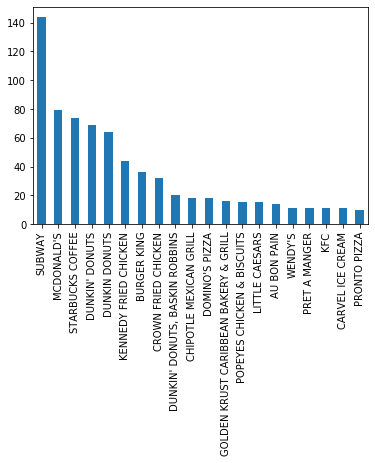

In [10]:
chains[:20].plot(kind='bar')

# [Q5, 6 points] What fraction of all restaurants are chain restaurants?

In [11]:
frac_of_chains = chains[restcount['DBA'].value_counts()>1].index
frac_of_chains

Index(['SUBWAY', 'MCDONALD'S', 'STARBUCKS COFFEE', 'DUNKIN' DONUTS',
       'DUNKIN DONUTS', 'KENNEDY FRIED CHICKEN', 'BURGER KING',
       'CROWN FRIED CHICKEN', 'DUNKIN' DONUTS, BASKIN ROBBINS',
       'CHIPOTLE MEXICAN GRILL',
       ...
       'MOMO SUSHI', 'S'MAC', 'OBAO', 'BOCCA DI BACCO', 'KROLEWSKIE JADLO',
       'BOULEVARD TAVERN', 'LA BERGAMOTE', 'CASCABEL TAQUERIA', 'CAFFEBENE',
       'GLAZE TERIYAKI GRILL'],
      dtype='object', length=368)

In [12]:
def func(id):
    if restcount.loc[id, 'DBA'] in frac_of_chains:
        return True
    return False

restcount_chain = restcount[restcount.index.map(func)]

In [13]:
float(len(restcount_chain))/ number_restaurants

0.16472216729286138

# [Q6, 6 points] Plot the number of non-chain restaurants in each
boro. First, we need to figure out all the non-chain restaurants, then select
out only those restaurants, and finally plot the number of such restaurants
by boro. Make sure to look at the plot; we don’t want to see... oh... the
“missing” boro.

In [14]:
#All_Rest = df.drop_duplicates('CAMIS', keep='first').dropna()
#Non_Chain = All_Rest.drop_duplicates('DBA', keep = False)
#Non_Chain_Numbers= Non_Chain['BORO'].value_counts()
#Non_Chain_Numbers[:5].plot(kind = 'bar')

def ourfunc(id):
    if restcount.loc[id,'DBA'] in frac_of_chains:
        return True
    return False

In [15]:
restcount_nonchain = restcount[restcount.index.map(ourfunc) == False]

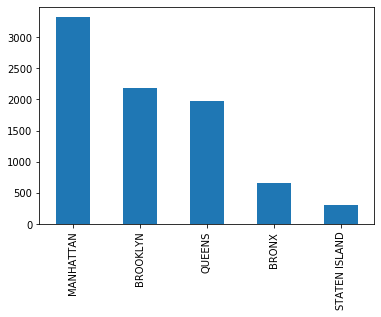

In [16]:
restcount_nonchain_all = restcount_nonchain[restcount_nonchain['BORO']!='Missing']
#plot
restcount_nonchain_all['BORO'].value_counts().plot(kind='bar')

# [Q7, 8 points] Plot the fraction of non-chain restaurants in each
boro. The boro with the most non-chain restaurants might just be the
boro with the most restaurants in general. If we want to find the boro that
attracts the most “independent” restauranteurs, we must divide the number
of non-chain restaurants by the total number of restaurants in the boro. Plot
this.
Is the boro with the most independent restaurants also the one with the
highest ratio of independent restaurants?

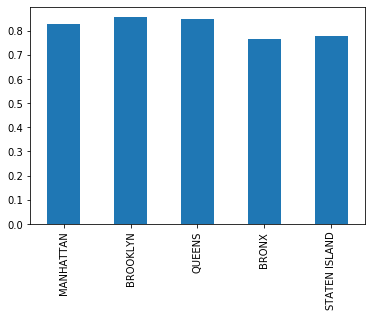

In [17]:
All_Rest= df.drop_duplicates('CAMIS', keep= 'first').dropna()

Non_Chain = All_Rest.drop_duplicates('DBA', keep = False)

All_Rest_Numbers=All_Rest['BORO'].value_counts()

Non_Chain_Numbers= Non_Chain['BORO'].value_counts()

frac_of_Non_Chain = Non_Chain_Numbers/All_Rest_Numbers

frac_of_Non_Chain[:5].plot(kind = 'bar')

# [Q8, 6 points] Plot the popularity of cuisines. Which cuisines are
the most well-represented among all restaurants? Define the popularity of a
cuisine as the number of restaurants serving that cuisine. Plot the popularity
of the top 20 cuisines.

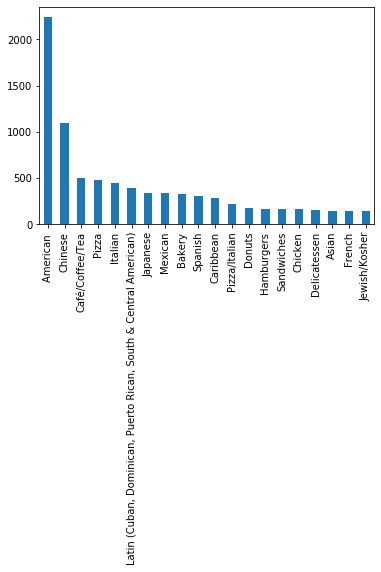

In [18]:
#All_Rest= df.drop_duplicates('CAMIS', keep= 'first').dropna()
#All_Rest = All_Rest.drop_duplicates('DBA', keep = 'first')
#Cuisine_Pop= All_Rest['CUISINE DESCRIPTION'].value_counts()
#Cuisine_Pop[:20].plot(kind = 'bar')

cuisine_all = restcount['CUISINE DESCRIPTION'].value_counts()
cuisine_all[:20].plot(kind='bar')

# [Q9, 9 points] Plot the cuisines among restaurants which never got
cited for violations. Ideally, you should explore and see what happens
when there is no violation, but here I will just tell you: the ’VIOLATION
CODE’ field is missing.
First, find the restaurants that were never cited for a code violation. The
compute the popularity of each cuisine among these “clean” restaurants. Plot
the popularity of the top-20 among these cuisines.

In [19]:
cuisines_clean = df[['CUISINE DESCRIPTION','VIOLATION CODE','RESTAURANT']].fillna(0).drop_duplicates(subset='RESTAURANT')

In [20]:
mask_clean= (cuisines_clean['VIOLATION CODE'] == 0)

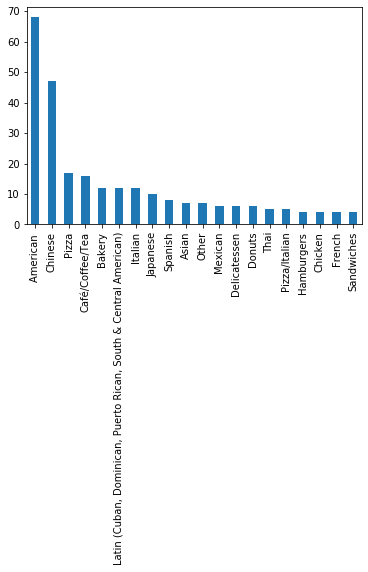

In [21]:
cuisines_clean_final = cuisines_clean[mask_clean]
cuisines_clean_final['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')



# [Q10, 6 points] What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.
• For each such cuisine, compute the ratio of the counts in Q9 to Q8.
This is the ratio of restaurants that never got cited, versus total number
of restaurants, for each cuisine.
• Find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are “most likely to be clean.”

In [24]:

All_Cuisine= restcount['CUISINE DESCRIPTION'].value_counts()
Mask_Cuisine = (All_Cuisine >=20)
Cuisine_Clean= cuisines_clean_final['CUISINE DESCRIPTION'].value_counts()
Ratio_Cuisine= Cuisine_Clean[Mask_Cuisine]/All_Cuisine[Mask_Cuisine]
Ratio_Cuisine.sort_values(ascending= False)[:10]



Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
Other                            0.067961
Irish                            0.057143
Asian                            0.047945
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Chinese                          0.042805
Delicatessen                     0.039216
Name: CUISINE DESCRIPTION, dtype: float64

# [Q11, 8 points] What are the most common violations in each borough? Create a table of the number of times each violation description
was observed in each borough, and figure out the most common violation
description for each borough.
To create the table, check out the crosstab function. We will see a more
general version of this when we discuss groupby in class.
Once you do have the table, you will still need to find the most common
violation description for each boroug

In [25]:
df_notmissing= df[df['BORO']!='Missing']
table_violations = pd.crosstab(index=df_notmissing['VIOLATION DESCRIPTION'],columns = df_notmissing['BORO'])
table_violations.idxmax()

table_violations

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,20,3


# [Q12, 9 points] What are the most common violations per borough,
after normalizing for the relative abundance of each violation?
Hopefully, the answer to the previous question left you unsatisfied, because
some violations are just very common, irrespective of borough. A better
approach would be to normalize the violation counts, as follows.
• Get overall frequencies: Figure out how common each violation is, over
the entire dataset; let’s call this violationFrequency.
• Normalize: Consider the table of number of violations by boro that
you created for the previous question. For each borough, divide the
number of violations of each type by the total number of violations for
that type; i.e., divide the series of violations by violationFrequency.
We want to do this for each borough.
• Find the biggest violations: Now, after this normalization, for each
borough, figure out the most common violation description.

In [26]:
freq_violation = df['VIOLATION DESCRIPTION'].value_counts()

In [27]:
#function

def normalize_divide(x):
    return x / freq_violation

Most_comm_violations = table_violations.apply(normalize_divide).idxmax()

Most_comm_violations

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# [Q13, 8 points] How many phone area codes correspond to a single
zipcode? The first three digits of the restaurant phone numbers are their
area codes. The area codes do not generally align with zip codes, but some
area codes are only for a single zip code. You must figure out how many area
codes have this property.
• To extract the first 3 characters of the phone number, recall that strings
are pretty similar to lists.

In [28]:
def find_area(x):
    return x[:3] #first 3 numbers of the phone numbers

In [29]:
df['PHONE AREA'] = df['PHONE'].map(find_area)

zipcode_ct = df.groupby(['PHONE AREA'])['ZIPCODE'].agg(['count'])

zipcode_ct_single = zipcode_ct[zipcode_ct['count']==1]   #show only where the coutns are == 1

zipcode_ct_single

,count
PHONE AREA,
171,1
410,1
615,1
702,1
728,1
855,1
905,1
954,1
970,1


In [30]:
len(zipcode_ct_single)  #number of phone area codes corresponding to a single zipcode

9

# [Q14, 10 points] Find common misspellings of street names Sometimes, it’s Avenue, and sometimes, it’s Ave. We will try to come up with an
automated way to find common misspellings. The idea is the following: if
Ave and Avenue are the same, they should show up often in similar-sounding
street names, e.g., Lexington Ave and Lexington Avenue.
• Create a new column, called STREET TYPE, which is the the last word
in the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”.
• Create another column, called STREET BASE, which contains everything
but the last word in the name of the street. For example, if the street
is “Astoria Boulevard”, the street base should be “Astoria”.
• Create a third column, called STREET BASE & ZIP, that combines the
street base and the zipcode.
• Create a table containing just these three columns, and remove any
duplicates or instances where street base is empty. This table now
contains unique street names, along with the street type.
• Merge this table with itself, on the STREET BASE & ZIP column. Thus,
in the new merged tabled, we will have two STREET TYPE fields for
each street base and zipcode. For example, if both Lexington Ave and
Lexington Avenue exist in the same zipcode, we will get a row for the
street base Lexington and the two street types Ave and Avenue.
• From the merged table, select only the rows where the street types are
different.
• Now, do a cross-tabulation of the two distinct street types (check out
the crosstab function in Pandas). This gives us the number of times
Ave and Avenue were used with the same STREET BASE & ZIP.
• From this cross-tabulation table, find the most commonly street type
that occurs with each of the following: AVE, ST, RD, PL, BOULEARD,
and BULEVARD

In [31]:
def street_type(x):
    x = x.strip()
    return x.split(' ')[-1]  #split at space and return the last word


In [32]:
df['STREET TYPE'] = df['STREET'].map(street_type)

In [33]:
def street_type(x):
    x= x.strip()
    return x.rsplit(' ',1)[0]   #removes from the right at the space and cuts out 1 word from the right
    #return ' '.join(x)


In [34]:
df['STREET BASE'] = df['STREET'].map(street_type)

In [35]:
def add_base_code(id):
    x = df.loc[id]
    return x['STREET BASE']+' '+x['ZIPCODE']


In [36]:

df['STREET BASE & ZIP'] = df.index.map(add_base_code)

In [37]:
df_common_street_type = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]
df_common_street_type = df_common_street_type.drop_duplicates()
df_common_street_type= df_common_street_type[df_common_street_type['STREET BASE']!='']
df_common_street_type

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
...,...,...,...
44613,ST,9TH,9TH 11101
44617,AVE,ROGERS,ROGERS 11216
44618,AVE,GRAND,GRAND 11378
44619,ST,E 48TH,E 48TH 10017


In [38]:
df_combine = df_common_street_type.merge(df_common_street_type,
                                  left_on = 'STREET BASE & ZIP',
                                  right_on = 'STREET BASE & ZIP',
                                  suffixes= ['_1','_2'])
df_combine = df_combine[df_combine['STREET TYPE_1']!=df_combine['STREET TYPE_2']]
df_combine

,STREET TYPE_1,STREET BASE_1,STREET BASE & ZIP,STREET TYPE_2,STREET BASE_2
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
5,ROAD,63,63 11374,DRIVE,63
6,DRIVE,63,63 11374,ROAD,63
12,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
...,...,...,...,...,...
3375,AVENUE,PATCHEN,PATCHEN 11233,AVE,PATCHEN
3461,STREET,48,48 11101,AVENUE,48
3462,AVENUE,48,48 11101,STREET,48
3512,PARKWAY,HUTCHINSON RIVER,HUTCHINSON RIVER 10465,PKWY,HUTCHINSON RIVER


In [39]:
match_street = pd.crosstab(df_combine['STREET TYPE_1'], df_combine['STREET TYPE_2'])

match_street

match_street.idxmax()[['AVE','ST','RD','PL','BOULEARD','BULEVARD']]

STREET TYPE_2
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object

# End #